In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [ ]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,377.399994,379.450012,374.524994,375.825012,290.678711,1963682
1,2010-01-05,377.500000,379.774994,373.274994,375.924988,290.756042,2014488
2,2010-01-06,375.924988,376.100006,366.500000,367.424988,284.181885,3349176
3,2010-01-07,367.750000,369.700012,355.500000,357.200012,276.273438,6474892
4,2010-01-08,358.000000,359.250000,348.250000,349.899994,270.627228,6048178


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,377.399994,379.450012,374.524994,375.825012,1963682
1,377.500000,379.774994,373.274994,375.924988,2014488
2,375.924988,376.100006,366.500000,367.424988,3349176
3,367.750000,369.700012,355.500000,357.200012,6474892
4,358.000000,359.250000,348.250000,349.899994,6048178


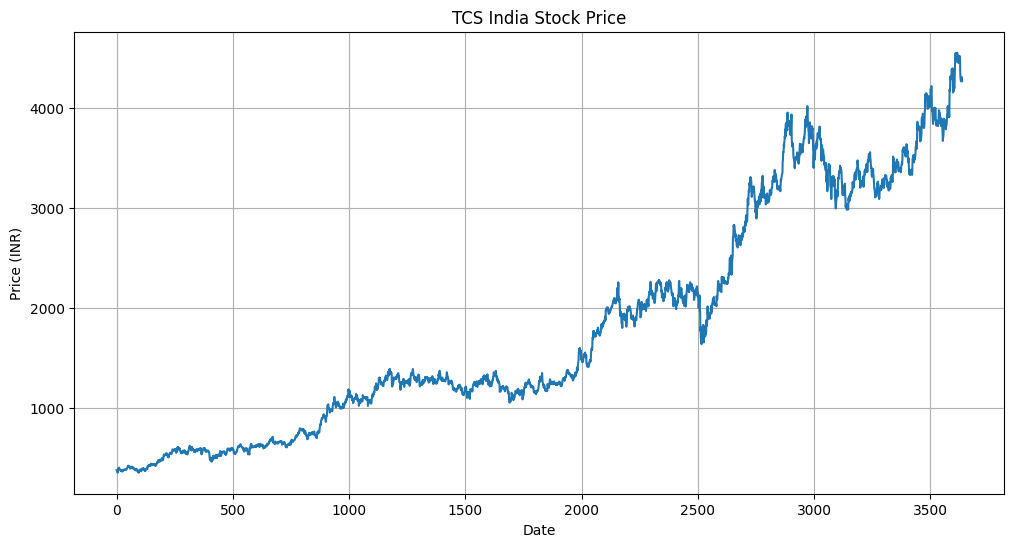

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df


,Open,High,Low,Close,Volume
0,377.399994,379.450012,374.524994,375.825012,1963682
1,377.500000,379.774994,373.274994,375.924988,2014488
2,375.924988,376.100006,366.500000,367.424988,3349176
3,367.750000,369.700012,355.500000,357.200012,6474892
4,358.000000,359.250000,348.250000,349.899994,6048178
...,...,...,...,...,...
3633,4251.649902,4291.000000,4240.000000,4271.299805,3012026
3634,4252.350098,4289.600098,4240.000000,4274.750000,2713073
3635,4260.000000,4316.799805,4260.000000,4292.500000,3964251
3636,4335.000000,4378.000000,4300.049805,4308.700195,3012477


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3633,4128.155488
3634,4132.269988
3635,4136.760989
3636,4140.637490


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

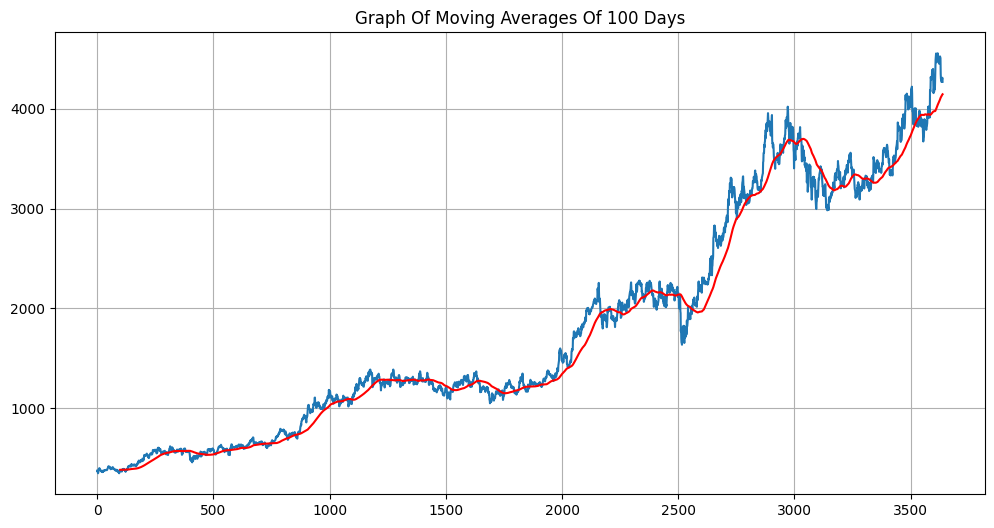

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3633,4015.519750
3634,4019.335250
3635,4023.235500
3636,4027.121001


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

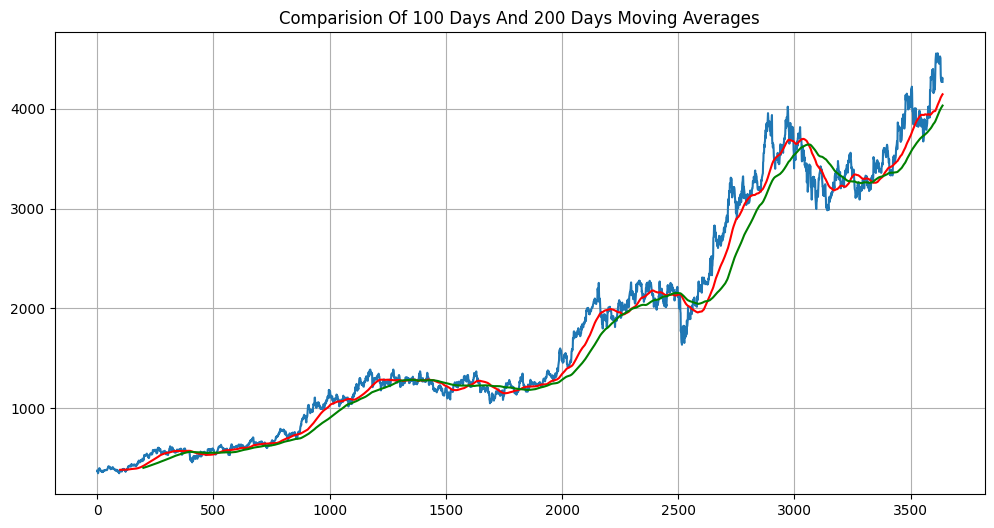

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [ ]:
df.shape

(3638, 5)

In [ ]:
train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2546, 7)
(1092, 7)


In [ ]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,377.399994,379.450012,374.524994,375.825012,290.678711,1963682
1,2010-01-05,377.500000,379.774994,373.274994,375.924988,290.756042,2014488
2,2010-01-06,375.924988,376.100006,366.500000,367.424988,284.181885,3349176
3,2010-01-07,367.750000,369.700012,355.500000,357.200012,276.273438,6474892
4,2010-01-08,358.000000,359.250000,348.250000,349.899994,270.627228,6048178


In [ ]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2546,2020-05-07,1910.000000,1934.449951,1883.349976,1891.650024,1775.891235,3166754
2547,2020-05-08,1939.099976,1939.500000,1886.250000,1893.400024,1777.534058,2686530
2548,2020-05-11,1909.000000,1951.400024,1909.000000,1935.300049,1816.869873,2449841
2549,2020-05-12,1933.400024,1956.500000,1910.250000,1949.500000,1830.200928,3256595
2550,2020-05-13,1994.000000,1994.000000,1925.650024,1949.650024,1830.341919,2656665


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01351019],
       [0.01356204],
       [0.00915373],
       ...,
       [0.81977777],
       [0.82097063],
       [0.80585269]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2446, 100, 1)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 32s 314ms/step - loss: 0.0978 - mean_absolute_error: 0.2200
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 264ms/step - loss: 0.0094 - mean_absolute_error: 0.0661
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 24s 314ms/step - loss: 0.0088 - mean_absolute_error: 0.0664
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 38s 281ms/step - loss: 0.0076 - mean_absolute_error: 0.0604
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 40s 267ms/step - loss: 0.0085 - mean_absolute_error: 0.0635
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 40s 257ms/step - loss: 0.0073 - mean_absolute_error: 0.0604
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 280ms/step - loss: 0.0062 - mean_absolute_error: 0.0549
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 40s 268ms/step - loss: 0.0059 - mean_absolute_error: 0.0525
Epoch 9/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 40s 257ms/step - loss: 0.0066 - mean_absolute_error: 0.0559
Epoch 10/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 278ms/step - loss: 0.0052 - mean_absolute_error: 0.0503
Epoch 11/

In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

(1092, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

In [ ]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

,0
0,2060.449951
1,2012.849976
2,2041.900024
3,2020.900024
4,2071.250000


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.14536915],
       [0.12905327],
       [0.13901078],
       ...,
       [0.91045109],
       [0.91600404],
       [0.90222458]])

In [ ]:
input_data.shape

(1192, 1)

In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1092, 100, 1)
(1092,)


In [ ]:
y_pred = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step


In [ ]:
y_pred.shape

(1092, 1)

In [ ]:
y_test

array([0.08750944, 0.08810929, 0.1024714 , ..., 0.91045109, 0.91600404,
       0.90222458])

In [ ]:
y_pred

array([[0.15874338],
       [0.16116562],
       [0.16337863],
       ...,
       [0.8973613 ],
       [0.893857  ],
       [0.89347243]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00034277])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

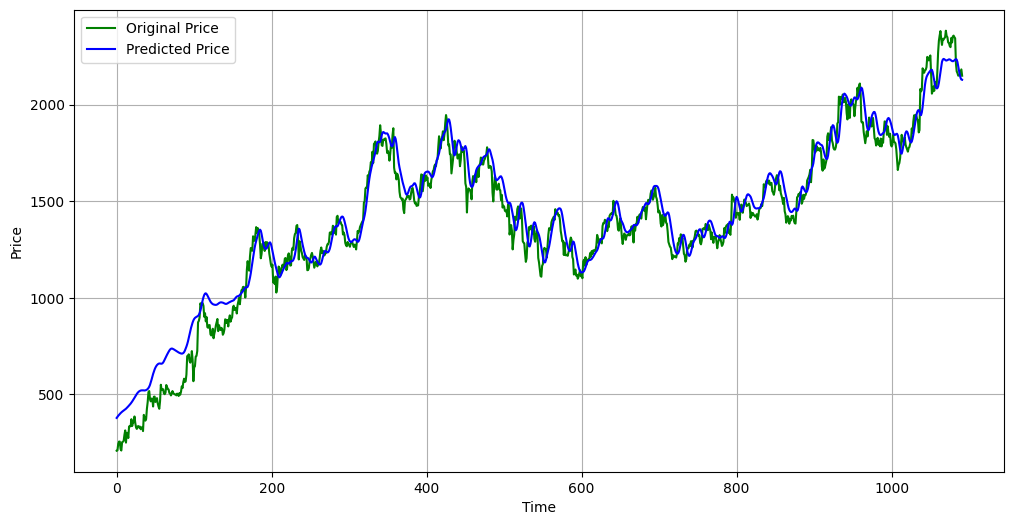

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'g', label = "Original Price")
plt.plot(y_pred, 'b', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100

print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 4.95%


In [ ]:
from sklearn.metrics import r2_score

actual = y_test

predicted = y_pred


r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9582496395423453


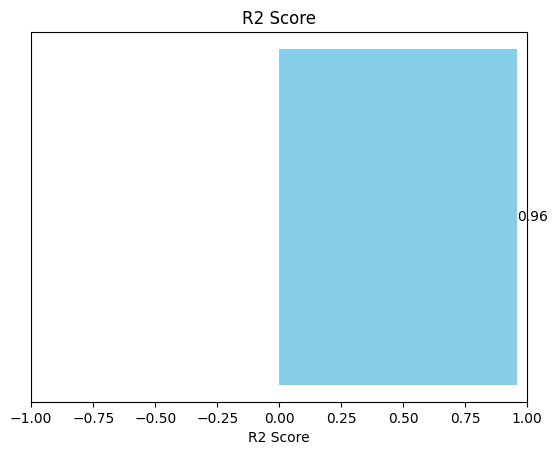

In [ ]:

fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')


ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

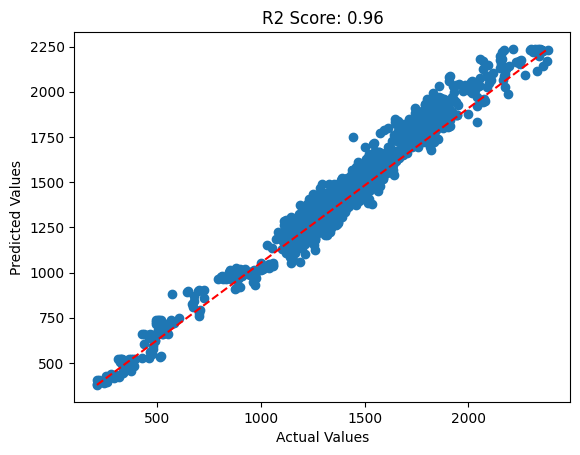

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object to scale the 'Close' price between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the 'Close' prices
scaled_data = scaler.fit_transform(df[['Close']])

# Append scaled data to the DataFrame for reference (optional)
df['Scaled_Close'] = scaled_data

# Verify the data
print(df.head())

         Open        High         Low       Close   Volume  Scaled_Close
0  377.399994  379.450012  374.524994  375.825012  1963682      0.006197
1  377.500000  379.774994  373.274994  375.924988  2014488      0.006220
2  375.924988  376.100006  366.500000  367.424988  3349176      0.004198
3  367.750000  369.700012  355.500000  357.200012  6474892      0.001766
4  358.000000  359.250000  348.250000  349.899994  6048178      0.000030
